# 拟合逻辑回归
支持向量机就是希望找到满足分类条件$$ y_i(\omega^Tx+b)\geq 1 $$并且将间距$$ ||\omega||^2 $$最大化的超平面，损失函数如下

$$ \frac{1}{n}\sum_{i=1}^n max(0,1-y_i(\omega^Tx+b))+a||\omega||^2 $$

当数据点正确分隔时，$$ y_i(\omega^Tx+b) $$总大于1，所以左项取值最大值为0。损失函数只与间距大小有关。a值越大，模型就回倾向于尽量将样本分隔开；a值越小，就会有更多的无差点存在。

构造满足$$ x_1*2+x_2 $$小于或等于1标记为0；大于1，标记为1，同时进行随机噪音化

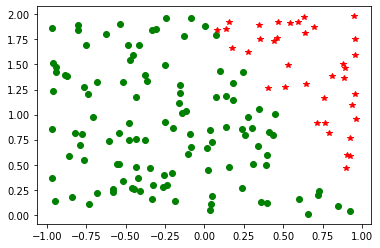

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 声明数据和标签
data=[]
label=[]
np.random.seed(0)
# 随机产生训练集
for i in range(150):
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(0,2)
    if x1*2+x2<=2:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(0)
        plt.plot(x1,x2,'go')
    else:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(1)
        plt.plot(x1,x2,'r*')
# 绘制图像
data=np.hstack(data).reshape(-1,2)
label=np.hstack(label).reshape(-1,1)
plt.show()



In [12]:
# 定义训练模型
learning_rate=0.01
training_epochs=4000
# 定义变量
x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))
W=tf.Variable(tf.zeros([2,1]))
b=tf.Variable(tf.zeros([1]))
# 线性平面
y=(tf.matmul(x,W)+b)
# 计算L2范数即权重的平方和，防止过拟合
l2_norm=tf.reduce_sum(tf.square(W))
# 损失函数
alpha=tf.constant([0.1])
classification_term=tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(y,y_))))
cross_entropy=tf.add(classification_term,tf.multiply(alpha,l2_norm))
# 优化器
cost_prev=0
train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [13]:
# 数据训练
loss_vec=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(training_epochs):
        sess.run(train_step,feed_dict={x:data,y_:label})
        train_cost=sess.run(cross_entropy,feed_dict={x:data,y_:label})
        loss_vec.append(train_cost)
        if i% 200==0:
            print(i,sess.run([W,b,cross_entropy],{x:data,y_:label}))
        if np.abs(cost_prev-train_cost) < 1e-6:
            print("the step:",i,sess.run([W,b,cross_entropy],{x:data,y_:label}))
            break
        else:
            cost_prev=train_cost
        
    # 记录最终的w和b
    W_val=sess.run(W)
    b_val=sess.run(b)

0 [array([[0.00160499],
       [0.00358394]], dtype=float32), array([0.00246667], dtype=float32), array([0.9978511], dtype=float32)]
200 [array([[0.1981399 ],
       [0.39041376]], dtype=float32), array([0.37119916], dtype=float32), array([0.7816467], dtype=float32)]
400 [array([[0.20450166],
       [0.34616038]], dtype=float32), array([0.49106786], dtype=float32), array([0.77294195], dtype=float32)]
600 [array([[0.18456757],
       [0.28551087]], dtype=float32), array([0.57206905], dtype=float32), array([0.76760393], dtype=float32)]
800 [array([[0.1679685 ],
       [0.23919068]], dtype=float32), array([0.6470682], dtype=float32), array([0.7635564], dtype=float32)]
1000 [array([[0.15066704],
       [0.19620746]], dtype=float32), array([0.708399], dtype=float32), array([0.76059765], dtype=float32)]
1200 [array([[0.13810942],
       [0.15968801]], dtype=float32), array([0.76266617], dtype=float32), array([0.7583747], dtype=float32)]
1400 [array([[0.12105697],
       [0.12925601]], dtype=

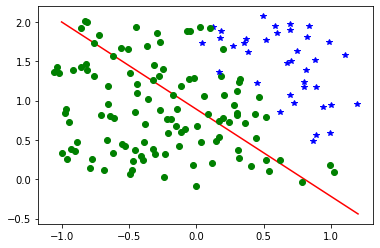

In [14]:
# 运行总结
w1=W_val[0][0]
w2=W_val[1][0]
k=-w1/w2
b=b_val
xx=np.linspace(-1,1.2,100)
yy=k*xx+b
plt.plot(xx,yy,'r-')
for i in range(150):
    if label[i]==0:
        plt.plot(data[i][0],data[i][1],"go")
    else:
        plt.plot(data[i][0],data[i][1],"b*")
plt.show()


如果一个问题的训练集中有大量特征，建议使用逻辑回归；如果训练集的数据量更大或者数据集是线性可分的，建议使用带核函数的SVM算法。